## Part 2: Exploratory Data Analysis (EDA)

In [4]:
# For data processing
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
sb.set(style='whitegrid')

In [5]:
thyroiddata= pd.read_csv("thyroiddata.csv")

# Exploratory Data Analysis

### Statistical Analysis

In [53]:
thyroiddata.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [55]:
thyroiddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Age                                  383 non-null    int64   
 1   Gender                               383 non-null    object  
 2   Currently Smoking                    383 non-null    object  
 3   Smoking History                      383 non-null    object  
 4   Radiotherapy History                 383 non-null    object  
 5   Thyroid Function                     383 non-null    object  
 6   Physical Examination                 383 non-null    object  
 7   Adenopathy                           383 non-null    object  
 8   Types of Thyroid Cancer (Pathology)  383 non-null    object  
 9   Focality                             383 non-null    object  
 10  Risk                                 383 non-null    category
 11  Tumor              

## 1. How Smoking affects Patients with Thyroid Cancer

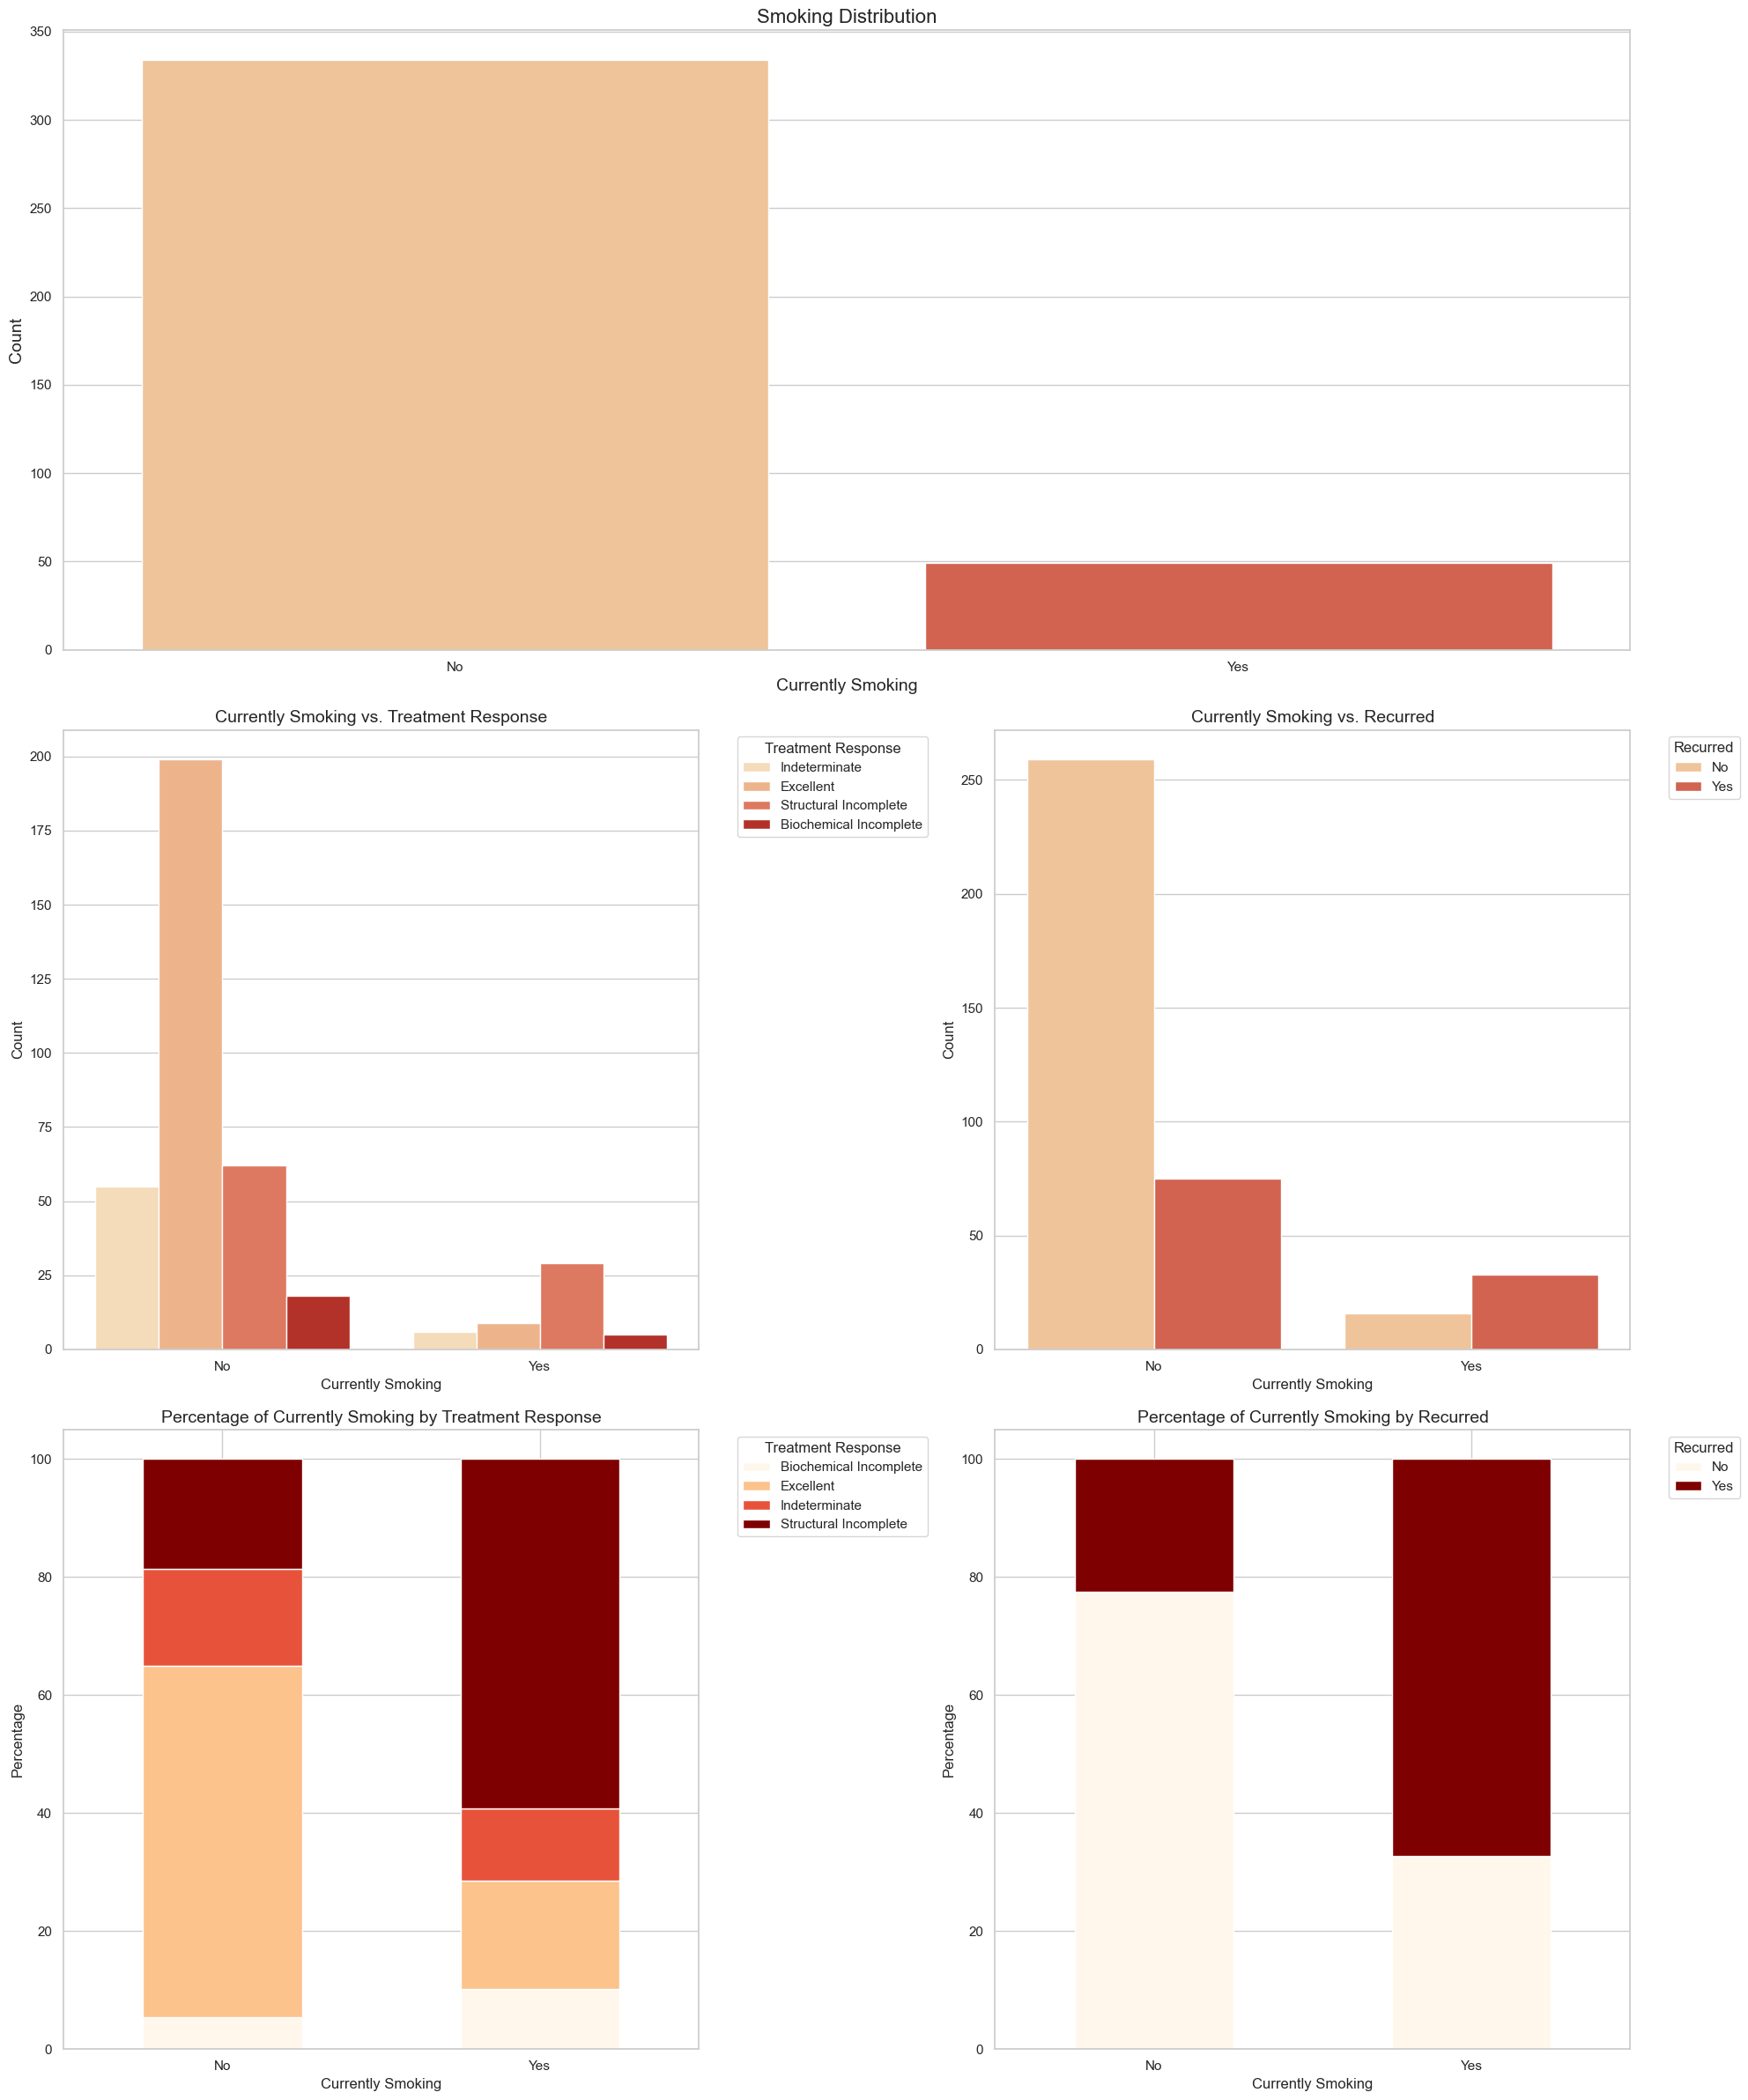

In [9]:
fig = plt.figure(figsize=(20, 24))

# Smoking Distribution (Top Centered, Larger Plot)
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
sb.countplot(x='Currently Smoking', data=thyroiddata, hue='Currently Smoking', palette='OrRd', ax=ax1)
ax1.set_title('Smoking Distribution', fontsize=16)
ax1.set_xlabel('Currently Smoking', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.tick_params(axis='x', rotation=0)

# Ensure columns are strings for plotting
thyroiddata["Currently Smoking"] = thyroiddata["Currently Smoking"].astype(str)
thyroiddata["Treatment Response"] = thyroiddata["Treatment Response"].astype(str)

# Calculate the percentage of 'Treatment Response' based on 'Currently Smoking'
treatment_smoking_percentage = thyroiddata.groupby(['Currently Smoking', 'Treatment Response'], observed=False).size().unstack(fill_value=0)
treatment_smoking_percentage = treatment_smoking_percentage.div(treatment_smoking_percentage.sum(axis=1), axis=0) * 100

# Currently Smoking vs. Treatment Response (Bottom Left)
ax2 = plt.subplot2grid((3, 2), (1, 0))
sb.countplot(x="Currently Smoking", hue="Treatment Response", data=thyroiddata, palette="OrRd", ax=ax2)
ax2.set_title("Currently Smoking vs. Treatment Response", fontsize=14)
ax2.set_xlabel("Currently Smoking", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.legend(title="Treatment Response", bbox_to_anchor=(1.05, 1), loc="upper left")
ax2.tick_params(axis='x', rotation=0)

# Currently Smoking vs. Recurred (Bottom Right)
ax3 = plt.subplot2grid((3, 2), (1, 1))
sb.countplot(x="Currently Smoking", hue="Recurred", data=thyroiddata, palette="OrRd", ax=ax3)
ax3.set_title("Currently Smoking vs. Recurred", fontsize=14)
ax3.set_xlabel("Currently Smoking", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)
ax3.legend(title="Recurred", bbox_to_anchor=(1.05, 1), loc="upper left")
ax3.tick_params(axis='x', rotation=0)

# Percentage of Currently Smoking by Treatment Response (Bottom Left)
ax4 = plt.subplot2grid((3, 2), (2, 0))
treatment_smoking_percentage.plot(kind="bar", stacked=True, colormap="OrRd", ax=ax4)
ax4.set_title("Percentage of Currently Smoking by Treatment Response", fontsize=14)
ax4.set_xlabel("Currently Smoking", fontsize=12)
ax4.set_ylabel("Percentage", fontsize=12)
ax4.legend(title="Treatment Response", bbox_to_anchor=(1.05, 1), loc="upper left")
ax4.tick_params(axis='x', rotation=0)

# Calculate the percentage of 'Recurred' based on 'Currently Smoking'
recurred_smoking_percentage = thyroiddata.groupby(['Currently Smoking', 'Recurred'], observed=False).size().unstack(fill_value=0)
recurred_smoking_percentage = recurred_smoking_percentage.div(recurred_smoking_percentage.sum(axis=1), axis=0) * 100

# Percentage of Currently Smoking by Recurred (Bottom Right)
ax5 = plt.subplot2grid((3, 2), (2, 1))
recurred_smoking_percentage.plot(kind="bar", stacked=True, colormap="OrRd", ax=ax5)
ax5.set_title("Percentage of Currently Smoking by Recurred", fontsize=14)
ax5.set_xlabel("Currently Smoking", fontsize=12)
ax5.set_ylabel("Percentage", fontsize=12)
ax5.legend(title="Recurred", bbox_to_anchor=(1.05, 1), loc="upper left")
ax5.tick_params(axis='x', rotation=0)

# Add spacing between subplots for better readability
plt.tight_layout()
plt.show()

From the above plots, we observe that:

1. Majority of Thyroid Cancer patients do not smoke.

2. Smoking __reduces the effectiveness of the thyroid cancer treatment__.
__Without smoking__, the percentage of patients experiencing __excellence in treatment response__ is __65%__, with __more than 75% not experiencing a recurrence__ of the cancer.
- However, a __much smaller proportion__ of about __17%__ of patients who are __currently smoking__ experiences excellence in treatment response, with about __60%__ experiencing __structural incomplete (cancer was not fully eradicated)__ ,as compared to the 20% of patients who are currently not smoking but experiences structural incomplete. 

3. Smoking __increases the likelihood of Thyroid Cancer Recurrence__.
- About __67%__ of __patients who are smoking__ experiences a __recurrence of the thyroid cancer__, which is significantly higher than the __< 25%__ of patients who aren't smoking that experiences it as well.
- This suggests that __smoking severely affects cancer treatment measures in reducing the likelihood of recurrence in the cancer, and therefore recovery__.

### Hence, these suggests that while smoking may not be a direct factor that causes thyroid cancer, it severely __diminishes__ the success of treatment outcomes and possibly __increases__ the likelihood of recurrence.

## How Adenopathy and Tumor (type) affects patients with Thyroid Cancer

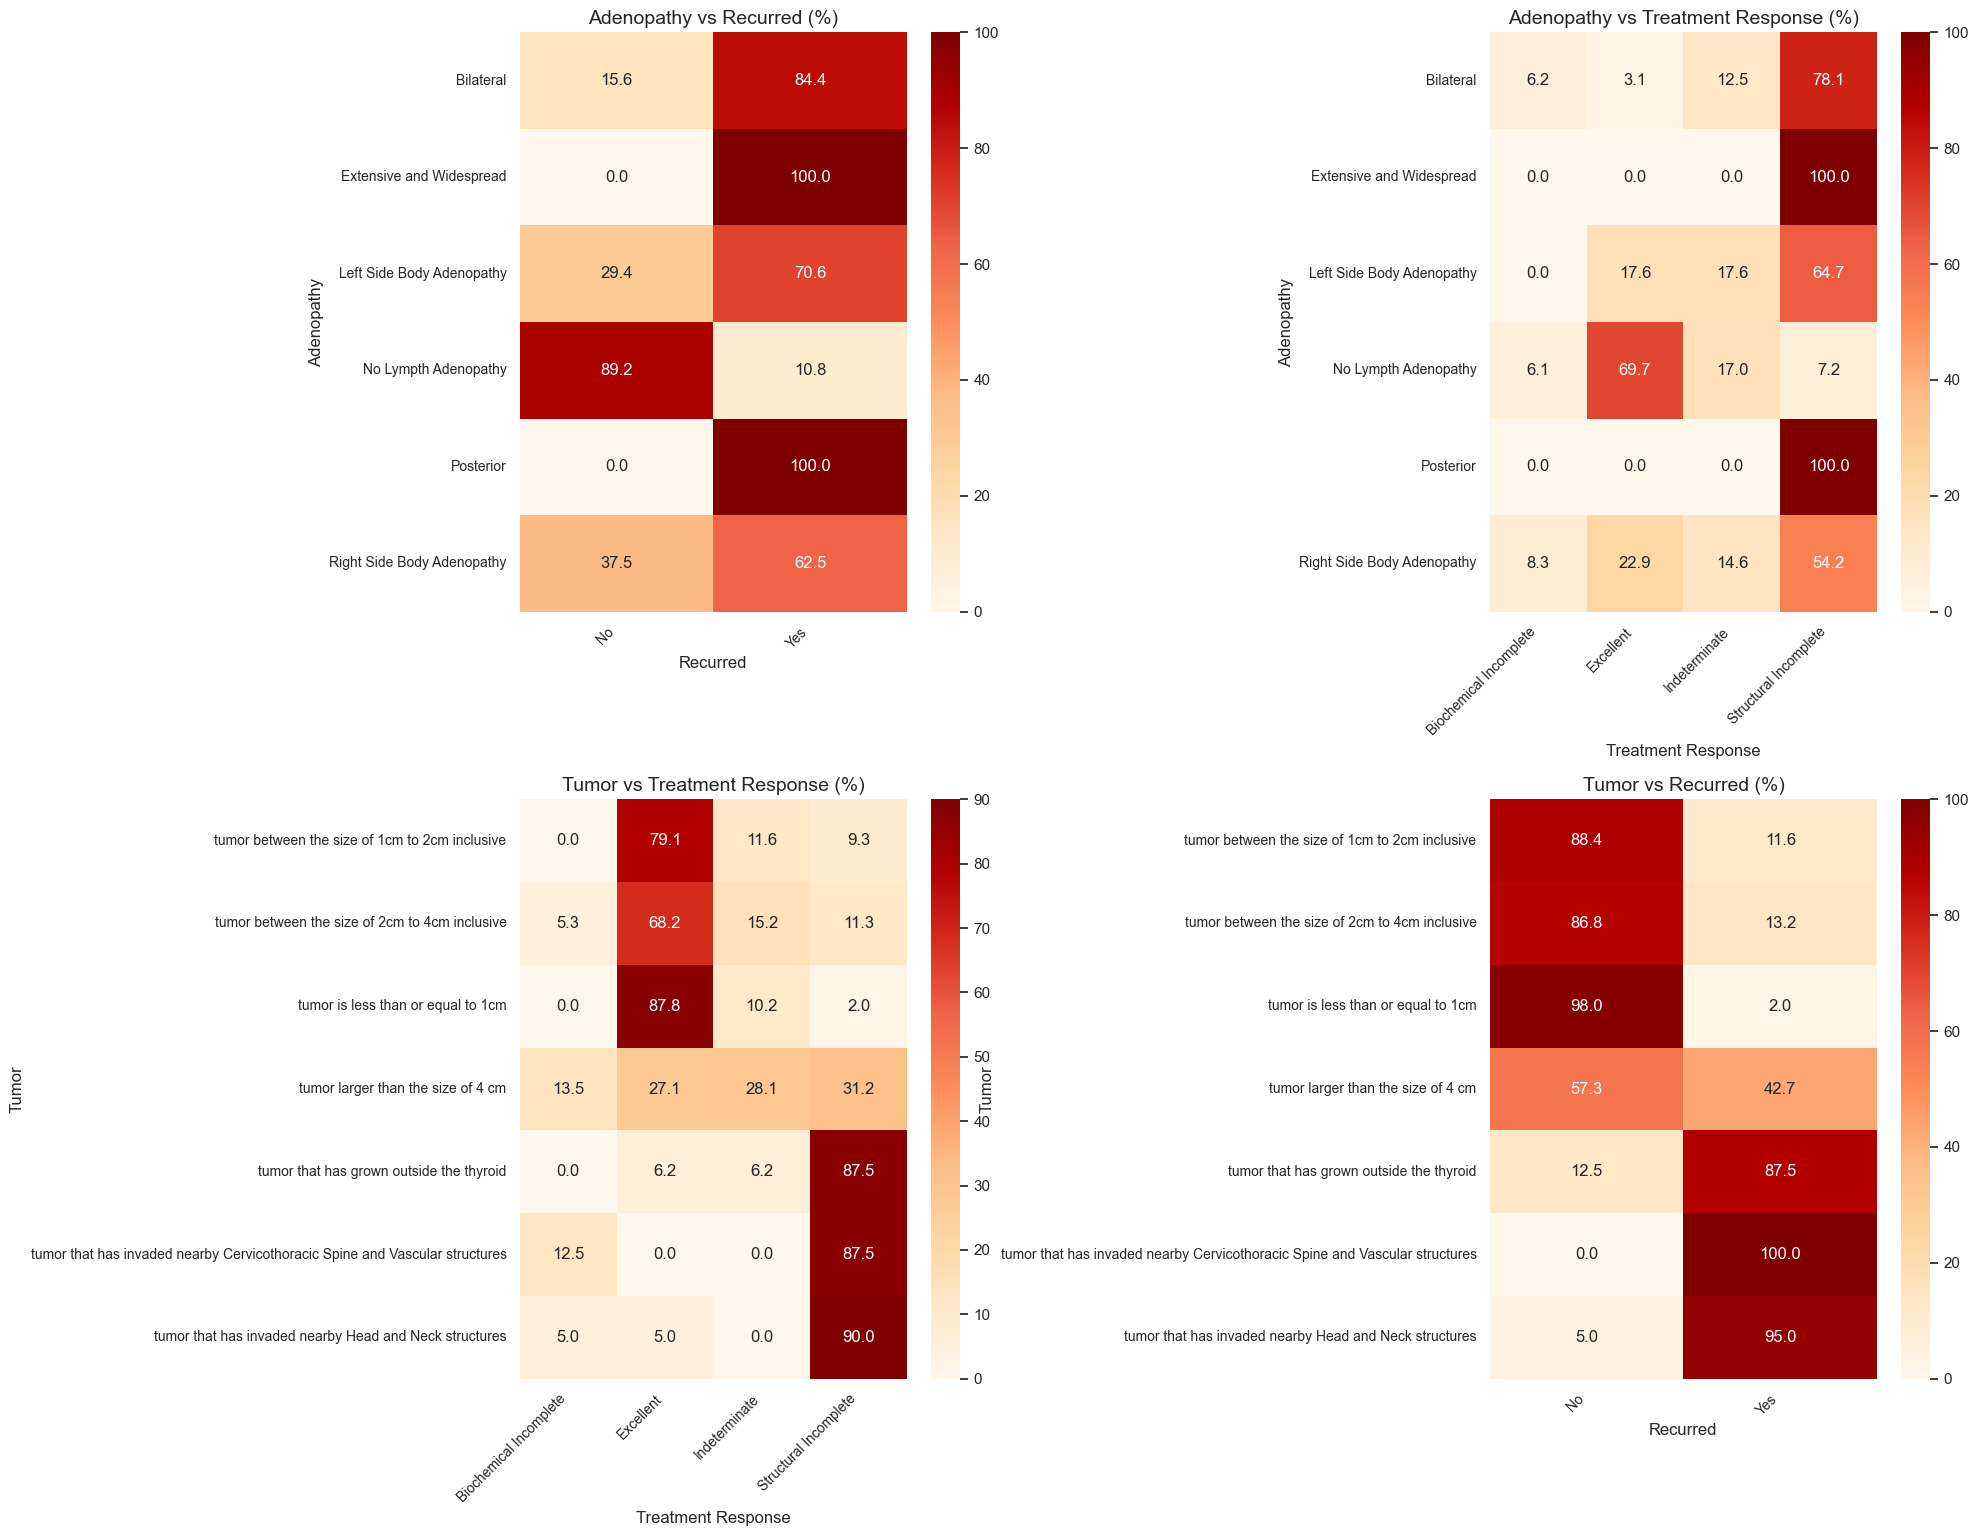

In [10]:
# Ensure necessary columns exist and are strings
columns_to_string = ["Adenopathy", "Recurred", "Treatment Response", "Tumor"]
if all(col in thyroiddata.columns for col in columns_to_string):
    thyroiddata[columns_to_string] = thyroiddata[columns_to_string].astype(str)
else:
    missing_cols = [col for col in columns_to_string if col not in thyroiddata.columns]
    raise KeyError(f"Missing columns in thyroiddata: {missing_cols}")

# Set up the plot canvas
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# 1. Adenopathy vs Recurred (Heatmap)
cross_tab_adenopathy_recurred = pd.crosstab(thyroiddata["Adenopathy"], thyroiddata["Recurred"], normalize='index') * 100
sb.heatmap(cross_tab_adenopathy_recurred, annot=True, cmap="OrRd", fmt=".1f", ax=axes[0, 0])
axes[0, 0].set_title("Adenopathy vs Recurred (%)", fontsize=14)
axes[0, 0].set_xlabel("Recurred", fontsize=12)
axes[0, 0].set_ylabel("Adenopathy", fontsize=12)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
axes[0, 0].set_yticklabels(axes[0, 0].get_yticklabels(), rotation=0, fontsize=10)

# 2. Adenopathy vs Treatment Response (Heatmap)
cross_tab_adenopathy_response = pd.crosstab(thyroiddata["Adenopathy"], thyroiddata["Treatment Response"], normalize='index') * 100
sb.heatmap(cross_tab_adenopathy_response, annot=True, cmap="OrRd", fmt=".1f", ax=axes[0, 1])
axes[0, 1].set_title("Adenopathy vs Treatment Response (%)", fontsize=14)
axes[0, 1].set_xlabel("Treatment Response", fontsize=12)
axes[0, 1].set_ylabel("Adenopathy", fontsize=12)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha="right", fontsize=10)
axes[0, 1].set_yticklabels(axes[0, 1].get_yticklabels(), rotation=0, fontsize=10)

# 3. Tumor vs Recurred (Heatmap)
cross_tab_tumor_recurred = pd.crosstab(thyroiddata["Tumor"], thyroiddata["Recurred"], normalize='index') * 100
sb.heatmap(cross_tab_tumor_recurred, annot=True, cmap="OrRd", fmt=".1f", ax=axes[1, 1])
axes[1, 1].set_title("Tumor vs Recurred (%)", fontsize=14)
axes[1, 1].set_xlabel("Recurred", fontsize=12)
axes[1, 1].set_ylabel("Tumor", fontsize=12)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha="right", fontsize=10)
axes[1, 1].set_yticklabels(axes[1, 1].get_yticklabels(), rotation=0, fontsize=10)

# 4. Tumor vs Treatment Response (Heatmap)
cross_tab_tumor_response = pd.crosstab(thyroiddata["Tumor"], thyroiddata["Treatment Response"], normalize='index') * 100
sb.heatmap(cross_tab_tumor_response, annot=True, cmap="OrRd", fmt=".1f", ax=axes[1, 0])
axes[1, 0].set_title("Tumor vs Treatment Response (%)", fontsize=14)
axes[1, 0].set_xlabel("Treatment Response", fontsize=12)
axes[1, 0].set_ylabel("Tumor", fontsize=12)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
axes[1, 0].set_yticklabels(axes[1, 0].get_yticklabels(), rotation=0, fontsize=10)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


From the above plots, we observe that:

In __Adenopathy__ reports,
Patients with any form of swollen lymph nodes have a higher likelihood of experiencing recurrence and poorer treatment response in Thyroid Cancer.
- __89.2%__ of Patients with __"No lymph Adenopathy"__ experiences __no recurrence in thyroid cancer__, and __69.7%__ experiences Excellent Treatment Response, suggesting an overall increased likelihood of recovery.
- Patients with __"Extensive and Widespread" and " Posterior"__ swollen lymph nodes had a __100% recurrence rate AND Structural Incomplete Treatment Response__, which suggests that these are the __most severe__ cases that are __hardest to treat completely__.
- __84.4%, 70.6%, 62.5%__ of patients with __"Bilateral", "Left Side Body Adenopathy", "Right Side Body Adenopathy"__ experiences __recurrence__ in Thyroid Cancer respectively, while __78.1%, 64.7%, 54.2%__ of patients with __"Bilateral", "Left Side Body Adenopathy", "Right Side Body Adenopathy"__ experiences __Structural Incomplete Treatment Response__, suggesting that their presence still cause cases to be __more serious__ and __harder to treat completely__.

In __Tumor (type)__ reports,
Patients with tumors that have grown beyond the thyroids or into other body areas will have the lowest chance of recovery.
- Patients with tumor sizes __less than 2cm__ have extremely good chances of experiencing __Excellent Treatment Response__ and __no recurrence__ in Thyroid Cancer.
- __90%, 87.5% and 87.5%__ of patients with __tumors that have grown outside the thyroid, invaded nearby Cervicothoracic Spine and Vascular structures, and invaded nearby Head and Neck structures__ respectively experiences __Structural incomplete Treatment Response__, which suggest that they are the __most severe__ extent of tumor that are likely to cause complications __hardest to treat completely__.
- __100%__ of patients with __tumor that has invaded nearby Cervicothoracic Spine and Vascular structures__ experiences __recurrence__ in Thyroid Cancer, suggesting that they are extreme cases that will definitely cause recurrence.
- __95% and 87.5%__ of patients with __tumor that has "invaded nearby Head and Neck structures" and "grown outside the thyroid"__ respectively experiences __recurrence__ in Thyroid Cancer, which suggests that they are __more severe__ cases that are __harder to treat completely__.

### Hence, these suggests that the __presence__ and __extensiveness__ of __Adenopathy and Tumors__ in patients will determine the __effectiveness of Treatment Outcome__ and __likelihood of recurrence__.


## 3. How Age affects Patients with Thyroid Cancer

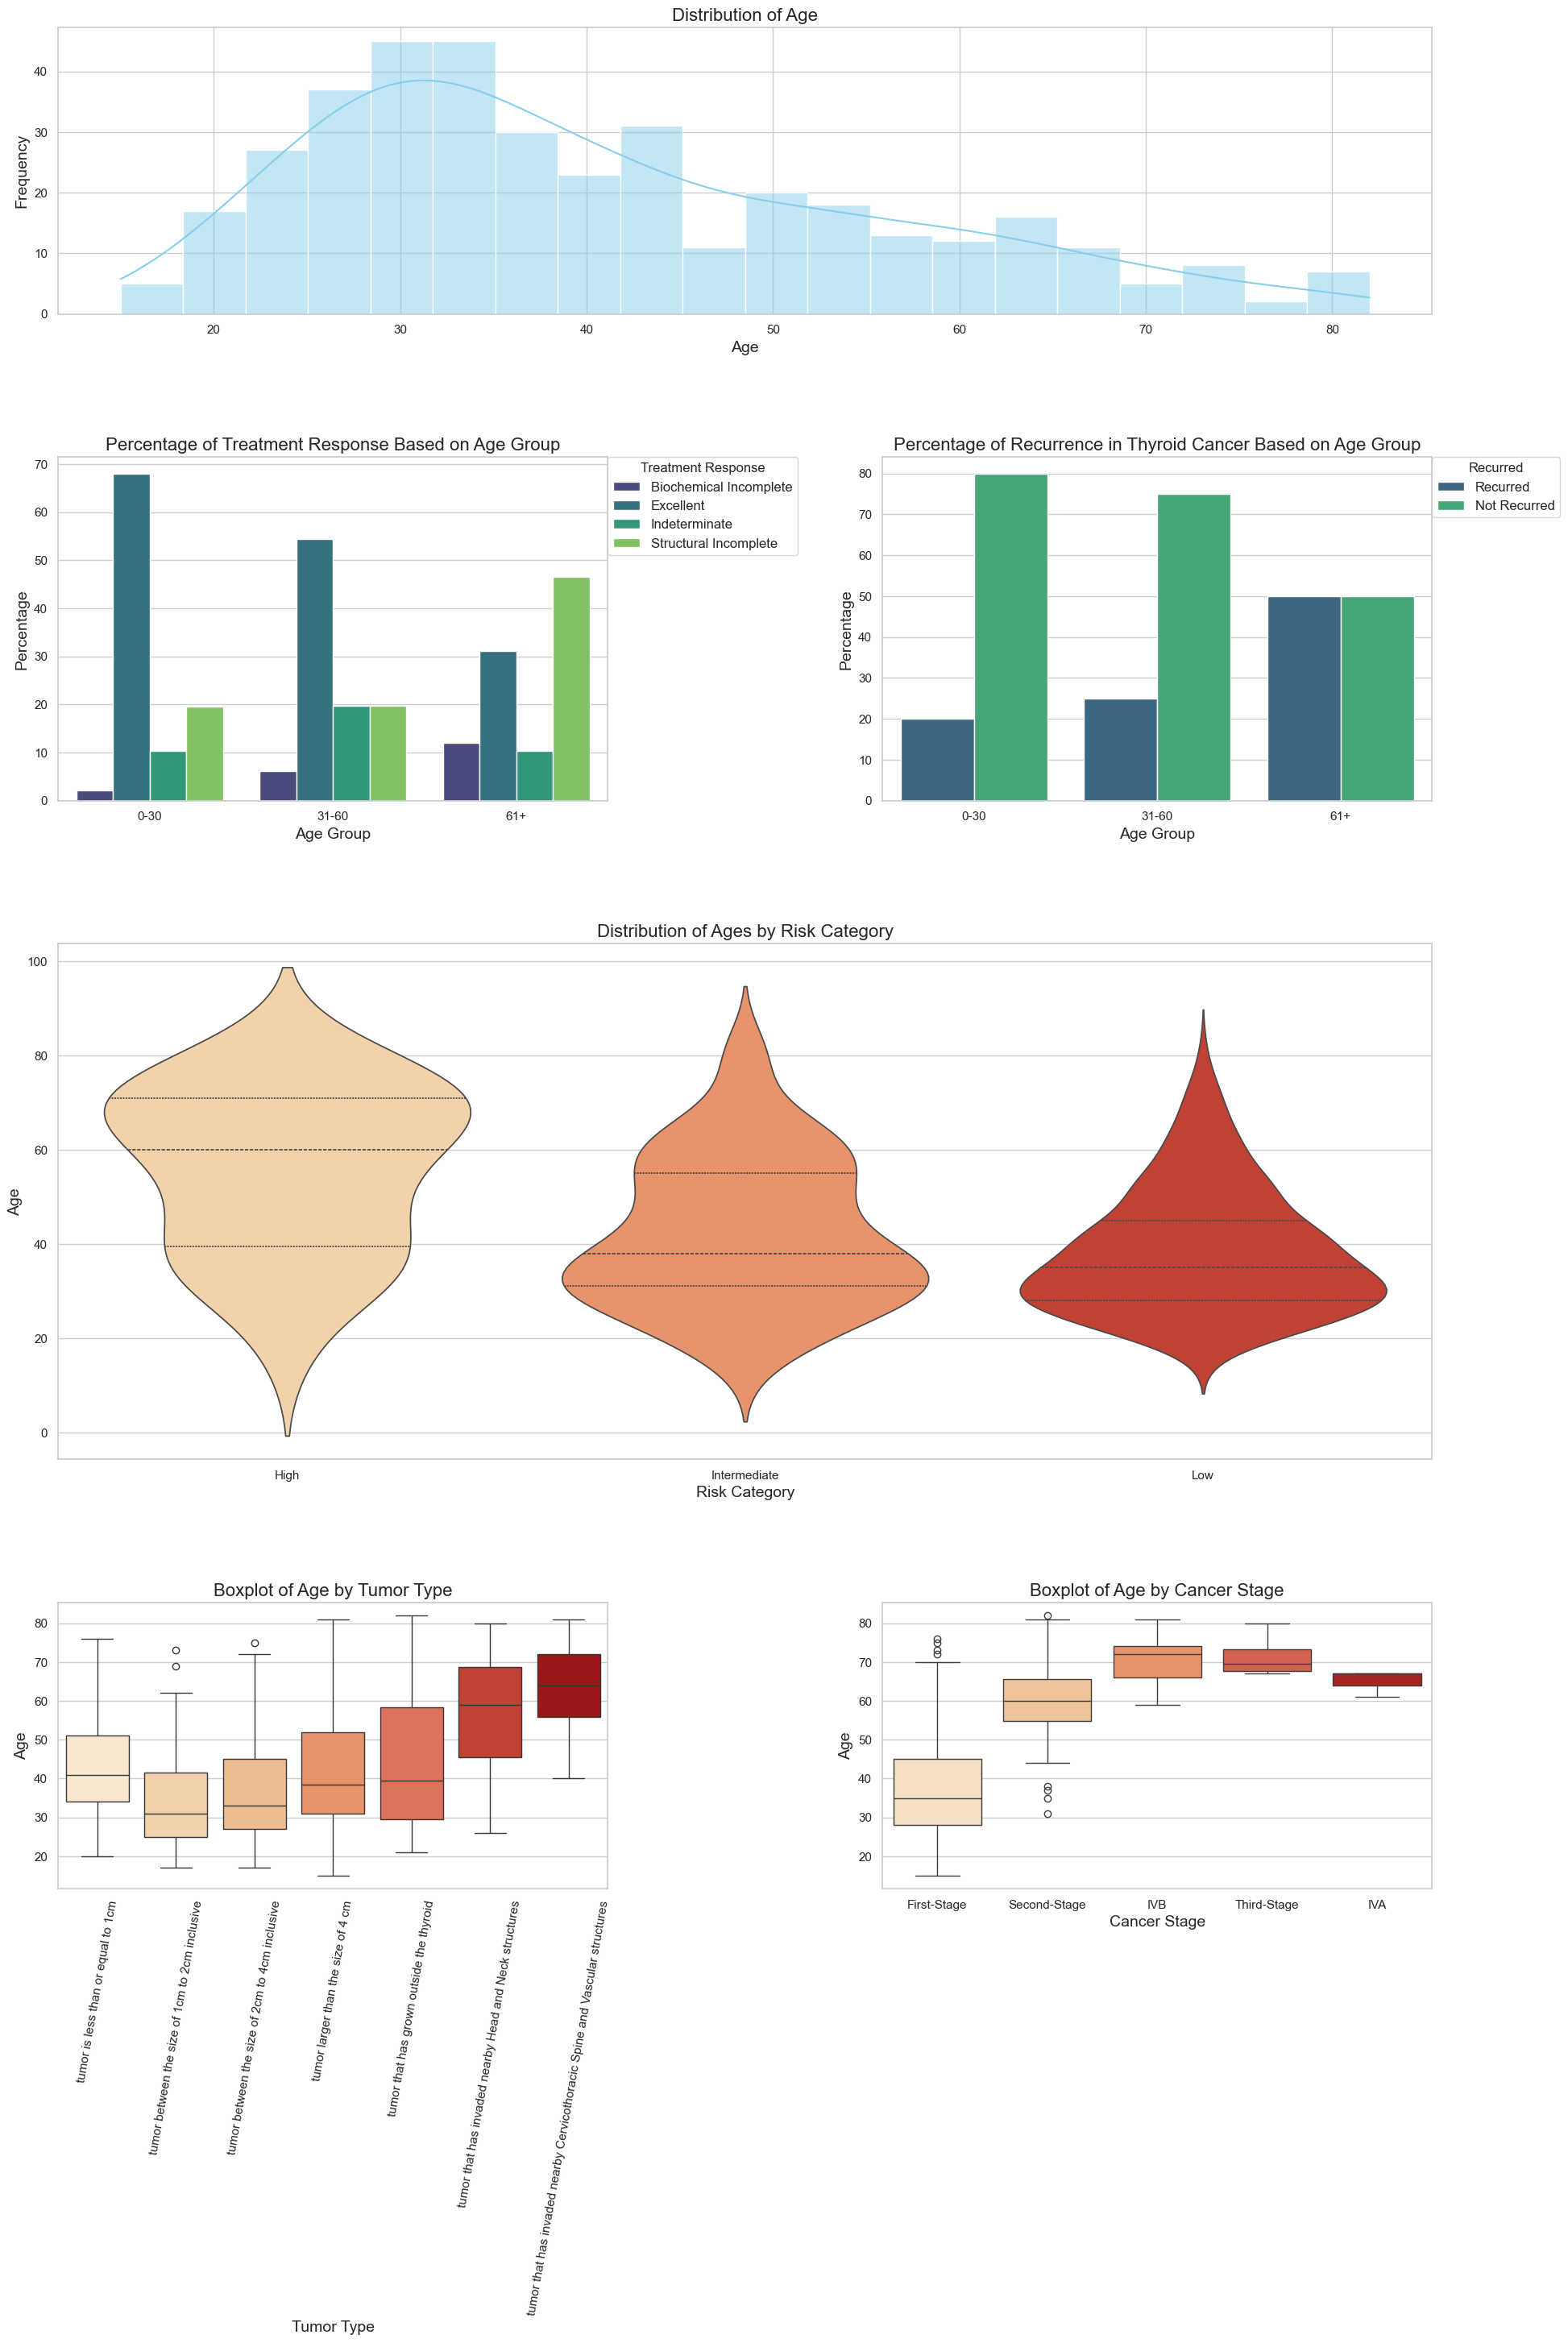

In [52]:
# Raw treatment response data by age group
age_group_treatment_percentage = pd.DataFrame({
    'Age Group': ['0-30', '31-60', '61+'],
    'Biochemical Incomplete': [2.06, 6.14, 12.07],
    'Excellent': [68.04, 54.39, 31.03],
    'Indeterminate': [10.31, 19.74, 10.34],
    'Structural Incomplete': [19.59, 19.74, 46.55]
})

# Melt the DataFrame for seaborn plotting
age_group_treatment_percentage_melted = pd.melt(
    age_group_treatment_percentage,
    id_vars='Age Group',
    var_name='Treatment Response',
    value_name='Percentage'
)

#Recurrence data by age group
age_group_recurred_percentage = pd.DataFrame({
    'Age Group': ['0-30', '31-60', '61+'],
    'Recurred': [20.0, 25.0, 50.0],
    'Not Recurred': [80.0, 75.0, 50.0]
})


fig = plt.figure(figsize=(22, 30))  

# Use fig.add_gridspec() for better spacing control
gs = fig.add_gridspec(4, 2, height_ratios=[1, 1.2, 1.8, 1], hspace=0.4, wspace=0.5)

# Top graph (Distribution of 'Age')
ax1 = fig.add_subplot(gs[0, :])
sb.histplot(thyroiddata['Age'], bins=20, kde=True, color='skyblue', ax=ax1)
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_title('Distribution of Age', fontsize=16)

# Bottom left graph (Percentage of 'Treatment Response' based on 'Age Group')
ax2 = fig.add_subplot(gs[1, 0])
sb.barplot(data=age_group_treatment_percentage_melted, x='Age Group', y='Percentage', hue='Treatment Response', palette='viridis', ax=ax2)
ax2.set_xlabel('Age Group', fontsize=14)
ax2.set_ylabel('Percentage', fontsize=14)
ax2.set_title('Percentage of Treatment Response Based on Age Group', fontsize=16)

# Move legend to the right outside the plot
ax2.legend(title='Treatment Response', bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=12)

# Prepare the melted data for 'age_group_recurred_percentage'
age_group_recurred_percentage_melted = pd.melt(age_group_recurred_percentage, id_vars=['Age Group'], 
                                               value_vars=['Recurred', 'Not Recurred'], 
                                               var_name='Recurred', value_name='Percentage')

# Bottom right graph (Percentage of 'Recurred' based on 'Age Group')
ax3 = fig.add_subplot(gs[1, 1])
sb.barplot(data=age_group_recurred_percentage_melted, x='Age Group', y='Percentage', hue='Recurred', palette='viridis', ax=ax3)
ax3.set_xlabel('Age Group', fontsize=14)
ax3.set_ylabel('Percentage', fontsize=14)
ax3.set_title('Percentage of Recurrence in Thyroid Cancer Based on Age Group', fontsize=16)
ax3.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=12)

# Bottom row graph (Distribution of Ages by Risk Category)
ax4 = fig.add_subplot(gs[2, :])

# Risk column
if 'Risk' in thyroiddata.columns:
    thyroiddata['Risk'] = pd.Categorical(thyroiddata['Risk'])  # Ensure categorical data
    order = sorted(thyroiddata['Risk'].unique())  # Sort categories
    
    sb.violinplot(x='Risk', y='Age', data=thyroiddata, hue='Risk', palette='OrRd', inner='quartile', order=order, ax=ax4)
    ax4.set_title('Distribution of Ages by Risk Category', fontsize=16)
    ax4.set_xlabel('Risk Category', fontsize=14)
    ax4.set_ylabel('Age', fontsize=14)
else:
    print("Warning: 'Risk' column not found in thyroiddata")

# Bottom row for boxplots
ax5 = fig.add_subplot(gs[3, 0])
sb.boxplot(x='Tumor', y='Age', data=thyroiddata, hue='Tumor', palette="OrRd", ax=ax5)
ax5.set_title('Boxplot of Age by Tumor Type', fontsize=16)
ax5.set_xlabel('Tumor Type', fontsize=14)
ax5.set_ylabel('Age', fontsize=14)
ax5.tick_params(axis='x', rotation=80)

ax6 = fig.add_subplot(gs[3, 1])
sb.boxplot(x='Stage', y='Age', data=thyroiddata, hue='Stage', palette="OrRd", ax=ax6)
ax6.set_title('Boxplot of Age by Cancer Stage', fontsize=16)
ax6.set_xlabel('Cancer Stage', fontsize=14)
ax6.set_ylabel('Age', fontsize=14)
ax6.tick_params(axis='x', rotation=0)

plt.show()


From the above plots, we observe that:
1. Thyroid Cancer is __most prominent__ in patients between the ages of __25 to 35 years old__. 

2. After treatement, there's a __decline in excellence post-treatment__. 
- While __over 65%__ of those __aged less than or equal to 30 years old__ experiences excellence after treatment, only about __55% of those between 31-60 years old__ experiences this, and only __31%__, a __significantly smaller__ proportion of patients __aged 61 and above__ ,enjoys this outcome. 

3. __Likelihood__ for patients to experience structural incomplete (cancer was not fully eradicated) over excellence __increases with age__. 
- About __68 - 19 = 49%__ more Patients aged __less than or equal to 30 years old__ are likely to experience excellence over structural incomplete, while about __55 - 20 = 35%__ more patients aged __between 31-60 years old__ are likely to experience excellence over structural incomplete, __BUT about 46 - 31 = 15%__ more patients aged above 60 are likely to experience __structural incomplete OVER excellence__.

4. Likelihood of Thyroid Cancer __recurrence increases with age__.
- While only __20%__ of patients aged __at most 30 years old__ will suffer a recurrence of the thyroid cancer, __25%__ of patients aged __between 31-60 years old__, a 5% increase, will suffer from recurrence, __BUT__ a staggering __50%__ of patients aged __above 60__ suffers from recurrence of the cancer. 

5. Patients aged between 60-80 years old are at the highest risk of experiencing an aggresive form of thyroid cancer.
- At high risk, peaks are most prominent around the age between 60-80 years old, while low and intermediate risks have peaks for patients around the age of 30 years old.

6. There is an overall __increasing trend__ for the __severity of tumor stages__ and __cancer stages respectively based on age__, suggesting that the __severity of thyroid cancer affects patients increases with age__.

 ### Hence, these show that it becomes __less likely__ for patients to make a full recovery from thyroid cancer __as they age__.

## 4. How Gender affects Patients with Thyroid Cancer

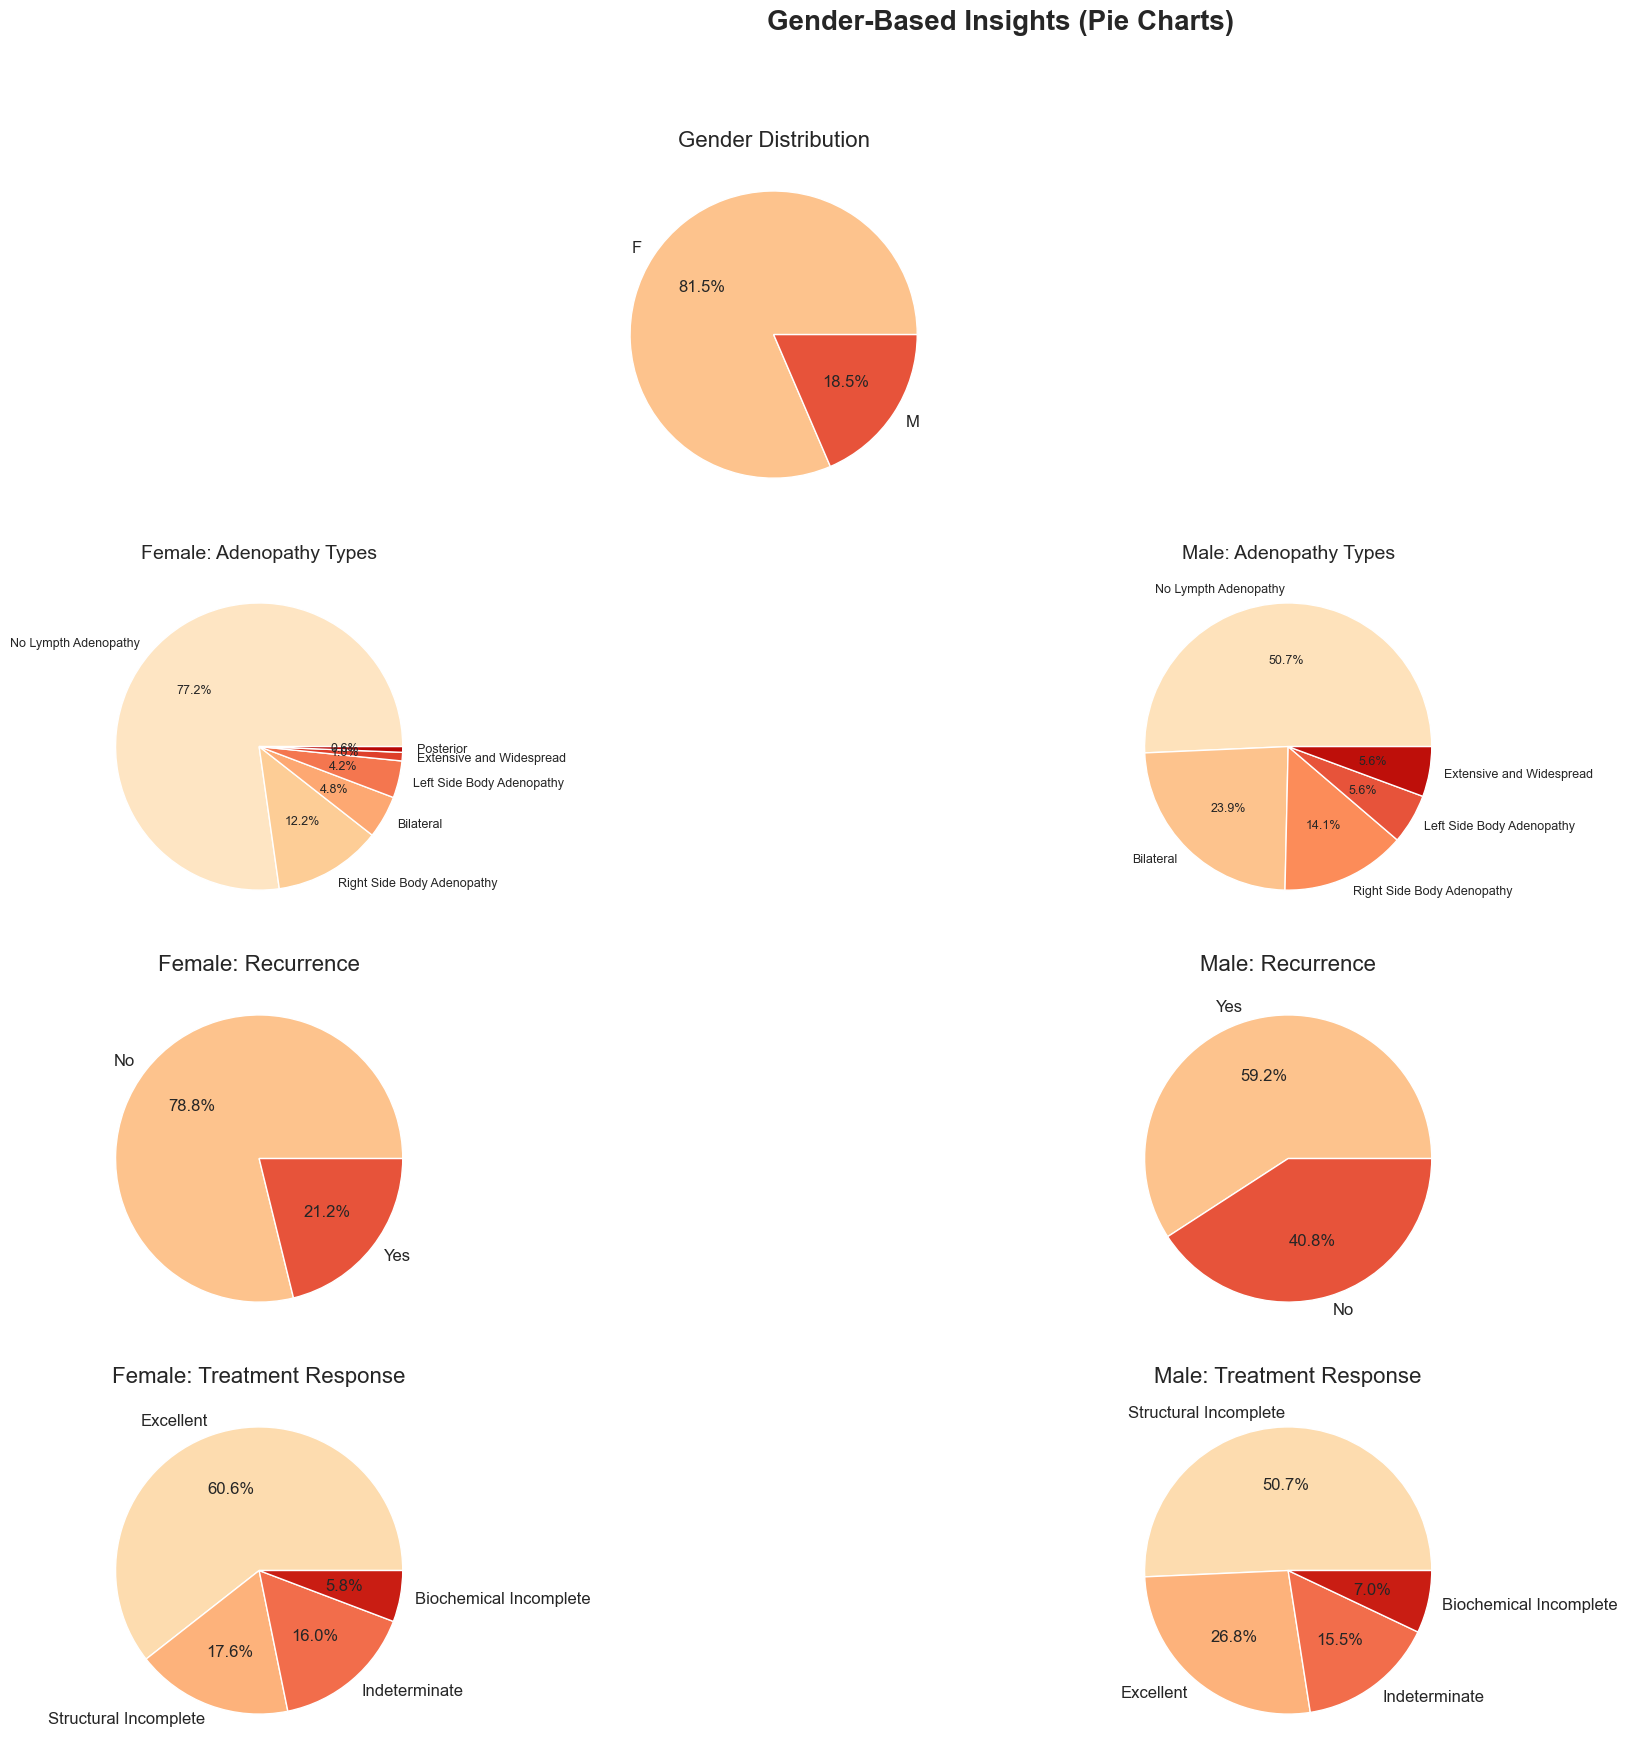

In [12]:
# Ensure columns are strings
thyroiddata["Gender"] = thyroiddata["Gender"].astype(str)
thyroiddata["Recurred"] = thyroiddata["Recurred"].astype(str)
thyroiddata["Treatment Response"] = thyroiddata["Treatment Response"].astype(str)
thyroiddata["Adenopathy"] = thyroiddata["Adenopathy"].astype(str)

# Set style
sb.set(style="whitegrid", palette="OrRd")
fig = plt.figure(figsize=(20, 18))  # Larger figure to accommodate 6 charts
fig.suptitle("Gender-Based Insights (Pie Charts)", fontsize=20, fontweight='bold')

# Row 1: Gender Distribution and Gender vs Adenopathy
ax1 = plt.subplot2grid((4, 4), (0, 1), colspan=1)
gender_counts = thyroiddata["Gender"].value_counts()
ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(gender_counts)), textprops={'fontsize': 12})
ax1.set_title("Gender Distribution", fontsize=16)

ax2 = plt.subplot2grid((4, 4), (1, 0))
female_adenopathy = thyroiddata[thyroiddata["Gender"] == "F"]["Adenopathy"].value_counts()
ax2.pie(female_adenopathy, labels=female_adenopathy.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(female_adenopathy)), textprops={'fontsize': 9})
ax2.set_title("Female: Adenopathy Types", fontsize=14)

ax3 = plt.subplot2grid((4, 4), (1, 2))
male_adenopathy = thyroiddata[thyroiddata["Gender"] == "M"]["Adenopathy"].value_counts()
ax3.pie(male_adenopathy, labels=male_adenopathy.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(male_adenopathy)), textprops={'fontsize': 9})
ax3.set_title("Male: Adenopathy Types", fontsize=14)

# Female vs Male Recurrence
ax4 = plt.subplot2grid((4, 4), (2, 0))
female_recurred_counts = thyroiddata[thyroiddata["Gender"] == "F"]["Recurred"].value_counts()
ax4.pie(female_recurred_counts, labels=female_recurred_counts.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(female_recurred_counts)), textprops={'fontsize': 12})
ax4.set_title("Female: Recurrence", fontsize=16)

ax5 = plt.subplot2grid((4, 4), (2, 2))
male_recurred_counts = thyroiddata[thyroiddata["Gender"] == "M"]["Recurred"].value_counts()
ax5.pie(male_recurred_counts, labels=male_recurred_counts.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(male_recurred_counts)), textprops={'fontsize': 12})
ax5.set_title("Male: Recurrence", fontsize=16)

# Row 3: Female vs Male Treatment Response
ax6 = plt.subplot2grid((4, 4), (3, 0))
female_treat_counts = thyroiddata[thyroiddata["Gender"] == "F"]["Treatment Response"].value_counts()
ax6.pie(female_treat_counts, labels=female_treat_counts.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(female_treat_counts)), textprops={'fontsize': 12})
ax6.set_title("Female: Treatment Response", fontsize=16)

ax7 = plt.subplot2grid((4, 4), (3, 2))
male_treat_counts = thyroiddata[thyroiddata["Gender"] == "M"]["Treatment Response"].value_counts()
ax7.pie(male_treat_counts, labels=male_treat_counts.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(male_treat_counts)), textprops={'fontsize': 12})
ax7.set_title("Male: Treatment Response", fontsize=16)

# Adjust layout for spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


From the above plots, we observe that:

1. There are significantly __more Female(81.5%)__ patients than __Male(18.5%) patients__.

2. Larger proportion of Male patients may present with __more aggressive lymph node involvement__, despite being fewer in number.
- __Most Female patients(77.2%) experiences No Lymph Adenopathy__ over male patients(50.7%), possibly indicating earlier detection or a lower likelihood of lymphatic spread.
- __23.9%__ and __5.6%__ of male patients have __"Bilateral"__ or __"Extensive and Widespread"__ types of Adenopathy, which as determined earlier, are the most severe Adenopathy that is hardest to treat completely and highly likely of recurrence. Compared to the __4.8%__ and __1%__ respectively for female patients, this suggests that a larger proportion of males will experience __more aggressive or advanced cases__ of thyroid cancer.

3. __Larger percentage of Female patients(78.8%)__ will experience a __recurrence__ of the thyroid cancer, as compared to male patients(59.2%).

4. __Female patients(60.6%)__ have higher likelihood of experiencing __Excellent treatment response__ as compared to male patients(50.7%). 
- This suggests that __male patients__ have a __higher likelihood__ of experiencing __further complications__ during or after undergoing cancer treatments.

### These insights suggests that while __more females__ are likely to __contract Thyroid Cancer__, __Male patients__ are more likely to experience severe complications that __increases likelihood of recurrence and poorer treatment response__.